In [1]:
# ロジステック回帰
# 0～1まででそのクラスに該当する確率を返す。シグモイド関数を使用する
# ロジステック回帰のコスト関数 Log loss　を偏微分する
# ↑ 個々のインスタンスについて、予測誤差を計算し、それと j　番目の特徴量の値をかけて、すべての訓練インスタンスの平均を計算する
#    すべての偏微分を収めた勾配ベクトルを作り、バッチ勾配降下法を使用する(確率GDやミニバッチGDも可)
# お決まりの設定
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

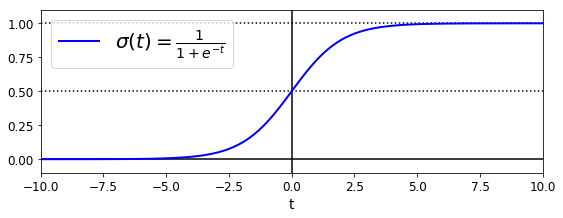

In [3]:
# ロジステック回帰のグラフを描画してみる
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t)) # シグモイド関数
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.savefig("logistic_function_plot")
plt.show()

In [4]:
# irisの分類
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [6]:
#print(iris.DESCR)

In [8]:
# 花弁の幅からバージニカとそれ以外を分類する
X = iris["data"][:, 3:]  # 花弁の幅
y = (iris["target"] == 2).astype(np.int)  # バージニカの場合は1 その他は0

In [9]:
# scikit-learn でロジステック回帰を行う
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)
# solver ： str、{'newton-cg'、 'lbfgs'、 'liblinear'、 'sag'、 'saga'}、デフォルト： 'liblinear'。
# 最適化問題で使用するアルゴリズム
# 小さなデータセットの場合は 'liblinear'が適していますが、大きなデータセットの場合は 'sag'と 'saga'が高速です。
# 多クラス問題の場合、 'newton-cg'、 'sag'、 'saga'、および 'lbfgs'だけが多項損失を処理します。
# 'newton-cg'、 'lbfgs'、および 'sag'はL2ペナルティを処理するのに対して、 'liblinear'および 'saga'はL1ペナルティを処理します。

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

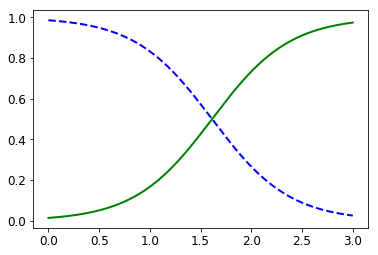

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 花弁の幅が0～3cmのインスタンスを要ししてモデルの推定確率を確認
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")  # 連続線はバージニカ
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica") # 破線はバージニカ以外
# X軸は花弁の幅、Y軸は確率

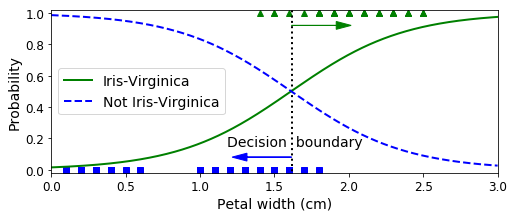

In [12]:
# 上記をもう少しきれいなグラフに表示してみる
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.savefig("logistic_regression_plot")
plt.show()

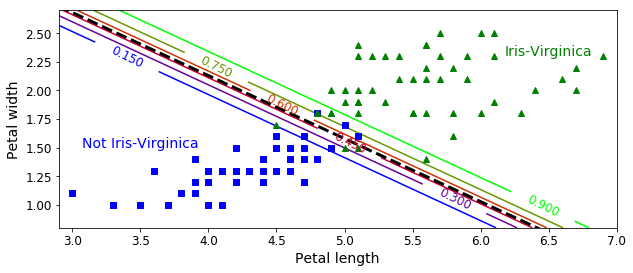

In [13]:
# 今度は特徴量を２つ(花弁の幅と長さ)を使用してモデルを作成してみる
# scikit-learnにおいてロジステック回帰はデフォルトでl2正則化されている
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # 花弁の幅と長さ
y = (iris["target"] == 2).astype(np.int) # こちらへ変更なし　バージニカは１、それ以外は0

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.savefig("logistic_regression_contour_plot")
plt.show()

In [ ]:
# 多項ロジスティック回帰
# ソフトマックス関数を使用する。インスタンスを受け取ると個々のクラス K のソフトマックス関数を計算し属する確率を出していく
# すべてのスコアを出したら結果を正規化する(パラメータ行列に格納する)
# 一度に一つのクラスだけを予測する(多クラス、多出力ではない)ので、相互排他的な利用のみになる。
# 1枚の写真に写った複数の人をぶんるいできるわけではない

# 交差エントロピーをコスト関数とすることで、ターゲットクラスに属する確率を低く推計した場合はペナルティを与えることで実装されている

In [14]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
# multi_class="multinomial"　で多クラス分類
# solver="lbfgs"　ソフトマックス関数をサポートするソルバー(多クラス分類のソルバー：'newton-cg'、 'sag'、 'saga'、および 'lbfgs')
# デフォルトのl2正則化は [c]の値を変えることで変更可能(正則化強度の逆数。SVMのように、値が小さいほど強い正規化が指定)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

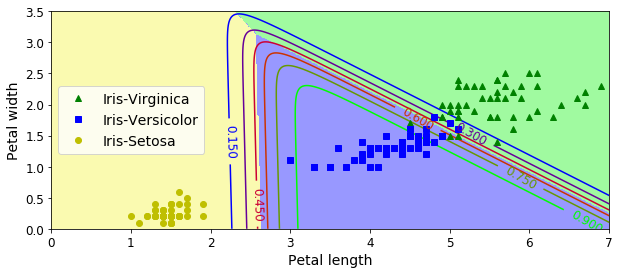

In [16]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig("softmax_regression_contour_plot")
plt.show()
# 決定境界を15％、30％、45％・・・で 区切って表示している